# Rossmann Store Analysis 

In [29]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# load the data
store=pd.read_csv("C:\\Programmings\\Projects\\Store\\store.csv",encoding='ISO-8859-1')
train=pd.read_csv("C:\\Programmings\\Projects\\Store\\train.csv",encoding='ISO-8859-1')

C:\Users\mks46\AppData\Local\Temp\ipykernel_4880\85952443.py:3: DtypeWarning: Columns (0: StateHoliday) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv("C:\\Programmings\\Projects\\Store\\train.csv",encoding='ISO-8859-1')


In [31]:
# store and train dataframes uncleaned and unmerged. They contain only the columns from their respective csv files.
# rossman.csv is the merged version of store and train dataframes. It contains all the columns from both dataframes.
data=pd.read_csv("C:\\Programmings\\Projects\\Store\\rossman.csv",encoding='ISO-8859-1')

C:\Users\mks46\AppData\Local\Temp\ipykernel_4880\1103104278.py:3: DtypeWarning: Columns (0: StateHoliday) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("C:\\Programmings\\Projects\\Store\\rossman.csv",encoding='ISO-8859-1')


### Total Sales

In [32]:
data['Sales'].sum()

np.int64(5873180623)

### Total Store

In [33]:
data['Store'].sum()

np.int64(568039744)

### Total customer

In [34]:
data['Customers'].sum()

np.int64(644041755)

### Total Active Store

In [35]:
data['Open'].sum()

np.int64(844392)

### Total Store Types

In [36]:
data['StoreType'].unique()

<StringArray>
['c', 'a', 'd', 'b']
Length: 4, dtype: str

### Sales by Store Types

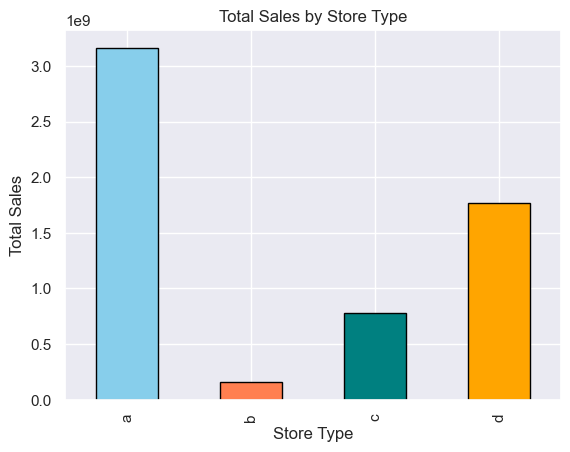

In [37]:
data.groupby('StoreType')['Sales'].sum().plot(kind='bar',color=['skyblue','coral','teal','orange'], edgecolor='black')

plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.show()

### Sales by Month

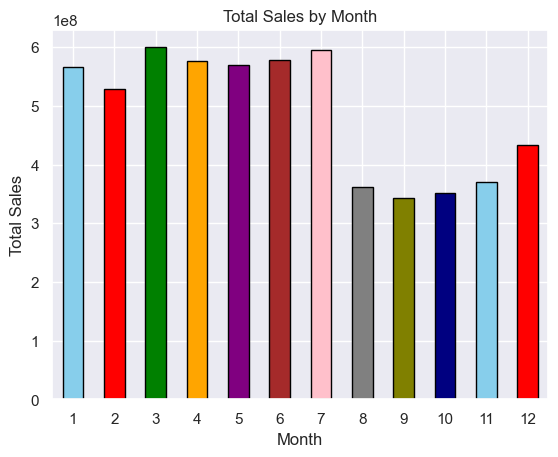

In [38]:
# Your date cleaning logic (Perfectly written!)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date']).copy() 
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# 1. ADD COLOR HERE (e.g., 'skyblue', 'coral', 'teal', or '#0047AB')
data.groupby('Month')['Sales'].sum().plot(kind='bar', color=['skyblue','red','green','orange','purple','brown','pink','gray','olive','navy'], edgecolor='black')

# 2. FIXED LABELS: Changed 'Year' to 'Month' to match your groupby
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Optional: Keeps the month numbers (1, 2, 3...) horizontal instead of tilted
plt.xticks(rotation=0) 

plt.show()

### Sales by Years

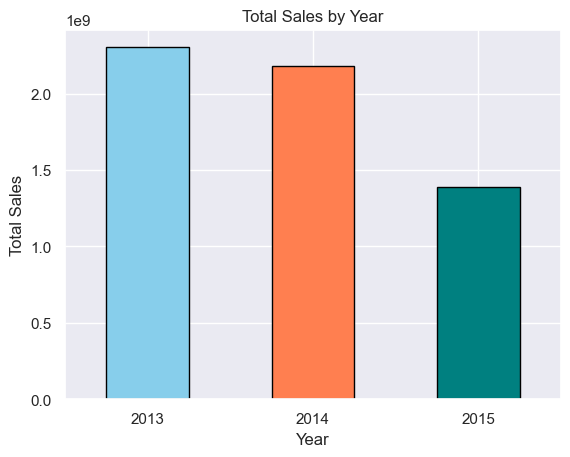

In [39]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date']).copy() 
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

data.groupby('Year')['Sales'].sum().plot(kind='bar', color=['skyblue','coral','teal','orange','purple'], edgecolor='black')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

### Sales by Competition Distance

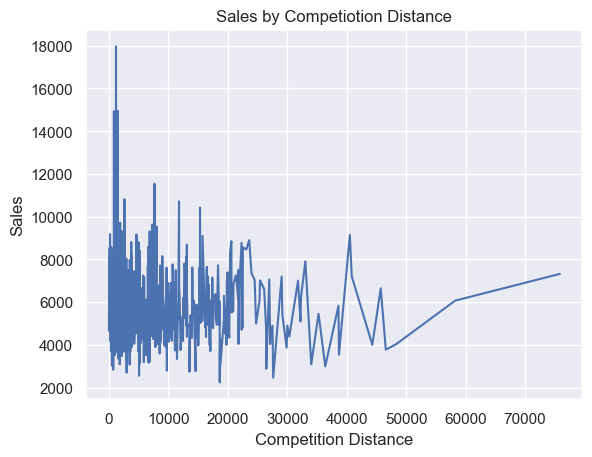

In [40]:
sales_by_competition = data.groupby("CompetitionDistance")["Sales"].mean()
plt.plot(sales_by_competition)
plt.xlabel("Competition Distance")
plt.ylabel("Sales")
plt.title("Sales by Competiotion Distance")
plt.show()

### Total Sales by State Holiday


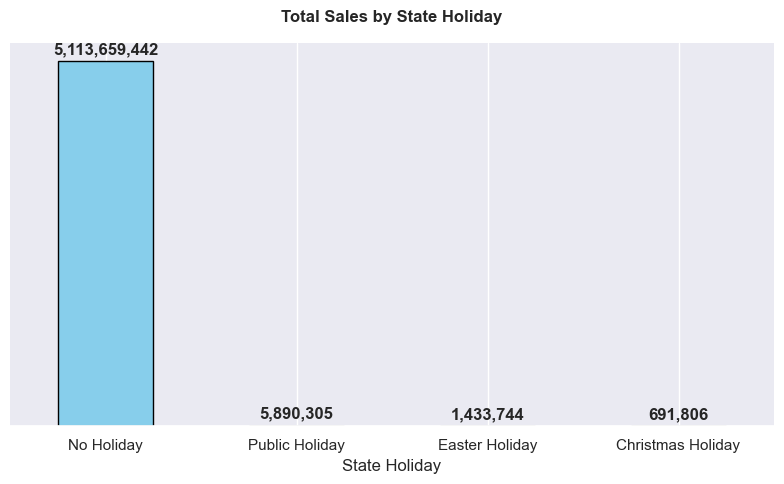

In [ ]:
labels = ['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas Holiday']
holiday_data = data.groupby('StateHoliday')['Sales'].sum().reindex(['0', 'a', 'b', 'c']).fillna(0)
holiday_data.index = labels

# 1. Capture the "Axes" object by assigning the plot to 'ax'
ax = holiday_data.plot(kind='bar', color=['skyblue', 'coral', 'teal', 'orange'], edgecolor='black', figsize=(8, 5))

# 2. Add the data labels automatically
# ax.containers[0] holds the bar shapes. padding=3 lifts the text slightly off the bar.
ax.bar_label(ax.containers[0], fmt='{:,.0f}', padding=3, fontweight='bold')

plt.xlabel("State Holiday")
plt.ylabel("Total Sales")
plt.title("Total Sales by State Holiday", fontweight='bold', pad=15)
plt.xticks(rotation=0)

# Optional: Hide the Y-axis spine and ticks since you now have exact labels on the bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False) 

plt.tight_layout()
plt.show()

### Sales by SchoolHoliday

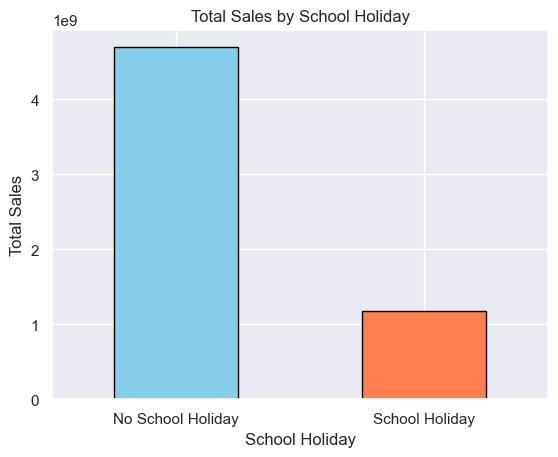

In [45]:
data['SchoolHoliday'] = data['SchoolHoliday'].replace({0: 'No School Holiday', 1: 'School Holiday'})
sales_by_school_holiday = data.groupby("SchoolHoliday")["Sales"].sum()
sales_by_school_holiday.plot(kind='bar', color=['skyblue', 'coral'], edgecolor='black')
plt.xlabel("School Holiday")
plt.ylabel("Total Sales")
plt.title("Total Sales by School Holiday")
plt.xticks(rotation=0)
plt.show()

In [41]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,2015,7
